# Kolleksjon med 5 datasett til edudata

September 2022

Inkludert kort introduksjon og innlastning av data. Se spesifikke filer `metadata_[filnavn]` for detaljer om hvert datasett.

**Oversikt:**
- Datasett 1: Havtemperatur - 4 datoer + koordinater
- Datasett 2: Havtemperatur - alle datoer fra 1982 - 2022
- Datasett 3: Periodetabellen
- Datasett 4: Biedata1
- Datasett 5: Matvaretabellen
- Datasett 6: Plantedata fra hele verden
- Datasett 7: Kloroplast genom, Arabidopsis Thaliana

## Datasett 1: Havtemperatur - 4 datoer + koordinater

**Fil:** `havoverflate_temperaturer.csv`   
**Kilde:** https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-sea-surface-temperature?tab=form  
**Beskrivelse:** Filen inneholder målte havoverflate-temperaturer i hele verden for 1. januar i de 4 årene 1982, 1992, 2002 og 2022. 


In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# lese fil (dette kan ta litt tid, ettersom det er mange datapunkter i tabellen)

fil = 'havoverflate_temperaturer.csv'
havtemp_df = pd.read_csv(fil, index_col=False)

# inspektere filen
havtemp_df.head()

,latitude,longitude,temp_01.01.1982,temp_01.01.1992,temp_01.01.2002,temp_01.01.2022
0,-78.575,-164.825,-0.87,-0.91,-0.34,-0.90
1,-78.575,-164.775,-0.87,-0.91,-0.34,-0.91
2,-78.575,-164.725,-0.87,-0.92,-0.34,-0.92
3,-78.575,-164.675,-0.87,-0.92,-0.34,-0.93
4,-78.575,-164.625,-0.87,-0.92,-0.34,-0.94


Vi ser at tabellen inneholder 4 kolonner med temperaturdata for de fire datoene, der hvert rad representerer et punkt i verden.
For å visualisere temperaturene på de ulike lengde- og breddegradene, plotter vi lengdegrader langs x-aksen og breddegrader langs y-aksen, og fargelegger alle punktene med temperatur-dataen. 

Det er ikke nødvendig å plotte alle datapunkter, ettersom dette er et stort datasett. Vi velger hvert 80. datapunkt: 

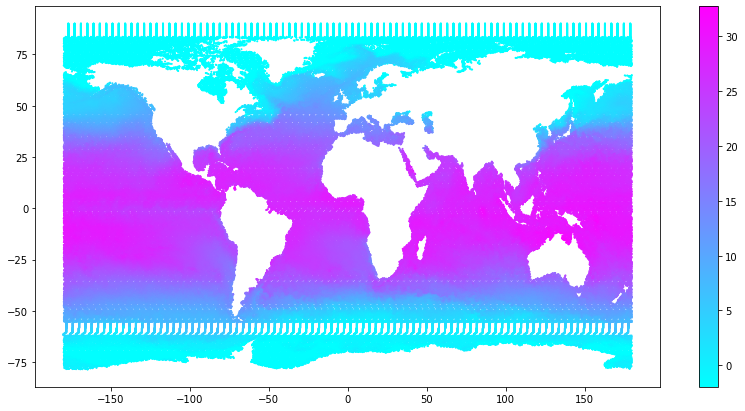

In [3]:
# Plotte temperaturene
havtemp_df = havtemp_df.iloc[::80, :]      # velger kun hvert 80. datapunkt  
dato = 'temp_01.01.1982'                   # velg dato

plt.figure(figsize = (14,7))
plt.scatter(havtemp_df.longitude, havtemp_df.latitude, c=havtemp_df[dato],  cmap="cool", s = 1)
plt.colorbar()

Tips: Visualiser med ulike farge-skalaer. Se viktigheten av fargevalg ved plotting for at et plott blir informativt. Endre ved parameteren "cmap".
- Forslag: "plasma", "cool", "terrain", "Set2", "Paired", "nipy_spectral"

## Datasett 2: Havtemperatur - min, max, gj.snitt, alle datoer fra 1982 - 2022
**Fil:** `havtemperatur_1982-1922.csv`  
**Kilde:** https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-sea-surface-temperature?tab=form  
**Beskrivelse:** Målte havoverflate-temperaturer i hele verden for alle datoer fra 1982 - 2022  

In [21]:
import pandas as pd
havtemp2 = pd.read_csv('havtemperatur_1982-1922.csv')
havtemp2.head()

,date,maxtemp,mintemp,meantemp
0,1982-01-01,33.16,-1.99,13.42
1,1982-01-01,33.16,-1.99,13.42
2,1982-02-01,31.23,-1.94,13.62
3,1982-03-01,32.70,-1.96,13.68
4,1982-04-01,31.98,-2.00,13.55


## Datasett 3: Periodetabellen

**Datafiler:**  `periodetabellen.csv`  
**Kilde:** https://gist.github.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee#file-periodic-table-of-elements-csv

In [9]:
periodetabell = pd.read_csv('periodetabellen.csv')

In [11]:
import matplotlib.pyplot as plt
# Lese inn periodetabellen: 

periodetabell = pd.read_csv('periodetabellen.csv')
print(periodetabell.head())

   AtomicNumber    Element Symbol  AtomicMass  NumberofNeutrons  \
0             1   Hydrogen      H       1.007                 0   
1             2     Helium     He       4.002                 2   
2             3    Lithium     Li       6.941                 4   
3             4  Beryllium     Be       9.012                 5   
4             5      Boron      B      10.811                 6   

   NumberofProtons  NumberofElectrons  Period  Group  Phase  ...  \
0                1                  1       1    1.0    gas  ...   
1                2                  2       1   18.0    gas  ...   
2                3                  3       2    1.0  solid  ...   
3                4                  4       2    2.0  solid  ...   
4                5                  5       2   13.0  solid  ...   

  FirstIonization   Density MeltingPoint BoilingPoint NumberOfIsotopes  \
0         13.5984  0.000090       14.175        20.28              3.0   
1         24.5874  0.000179          NaN

In [12]:
print(periodetabell.columns)
periodetabell.shape

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')


(118, 28)

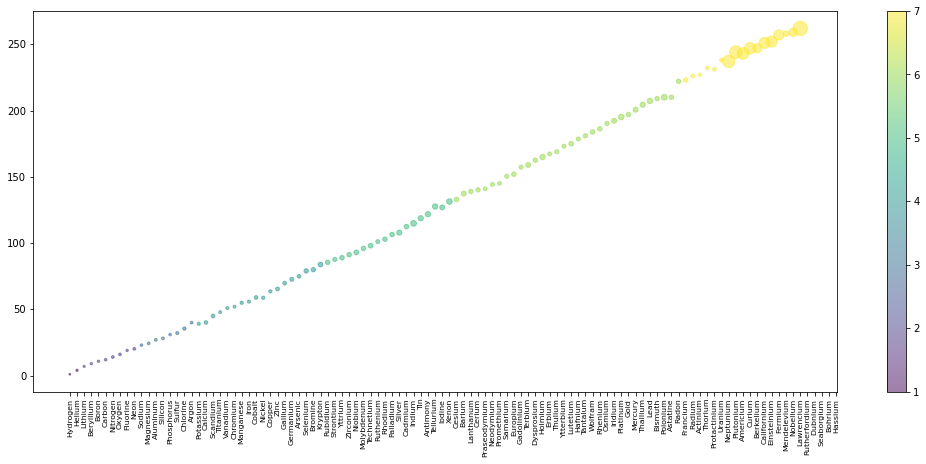

In [19]:
# Eksempel: Utforske periodetabell

x = periodetabell.Element
y = periodetabell.AtomicMass
size = periodetabell.NumberOfIsotopes         # Størrelse på prikker
color = periodetabell.NumberofShells           # Farger

plt.figure(figsize=(18,7))
plt.scatter(x=x, y=y, s=size, c=color, alpha=0.5)
plt.colorbar()
plt.xticks(rotation=90, size = 7.8)
plt.show()


## Datasett 4: Biedata1

**Kilde:** https://zenodo.org/record/4438013#.Yxicd3ZBxPb  
**Tilhørende artikkel:** https://www.nature.com/articles/s41467-021-21212-5#MOESM1  
**Datafiler:**  `biedata1.csv`   
**Beskrivelse:** Dataen beskriver hovedsaklig hvor lenge bier har oppholdt seg på 4 ulike "sosiale" arenaer i biesamfunnet, beskrevet som dansegulv, honning-lager, nær-utgang og hekkeområde. Dataen i disse fire kolonnene i datasettet summeres til 1, hvor kolonnen location_descriptor_count beskriver total mengde tid bien er observert på alle lokasjonene. I tillegg beskriver kolonnene `velocity_*` hastigheten til bien i mm/s.
   

In [22]:
biedata1 = pd.read_csv('biedata1.csv')
biedata1.head()

,bee_id,date,age,dance_floor,honey_storage,near_exit,brood_area_total,location_descriptor_count,death_date,hatch_date,velocity_peak_time,velocity_day,velocity_night
0,2048,2016-08-15,21,0.000000,0.474227,0.025773,0.500000,194.0,2016-08-28,2016-07-25,2.293511,1.498729,1.267362
1,2049,2016-08-15,21,0.083333,0.263889,0.291667,0.361111,72.0,2016-08-31,2016-07-25,1.221958,2.449739,1.417412
2,2050,2016-08-15,21,0.009404,0.539185,0.012539,0.438871,319.0,2016-08-27,2016-07-25,1.255342,1.165424,0.950118
3,2051,2016-08-15,21,0.000000,0.030303,0.121212,0.848485,33.0,2016-08-23,2016-07-25,1.333884,1.938736,0.961636
4,2052,2016-08-15,21,0.063291,0.101266,0.506329,0.329114,79.0,2016-09-03,2016-07-25,0.737965,1.607989,0.995056


## Datasett 5: Matvaretabellen


**Beskrivelse:** Matvaretabellen viser verdier for innhold av energi og næringsstoffer i 100 gram matvare for råvarer, produkter, tilberedte matvarer og retter. Matvarene er plassert i elleve hovedgrupper med tilhørende undergrupper.  
**Kilde:** https://matvaretabellen.no/  
**Kildehenvisning:** "Matvaretabellen 2021. Mattilsynet. www.matvaretabellen.no"    
**Datafiler:** `matvaretabellen.csv`  


In [7]:
import pandas as pd
matvaretabellen = pd.read_csv('matvaretabellen.csv')
matvaretabellen.head()

,MatvareID,Matvare,Spiselig_del,Vann(g),Kilojoule,Kilokalorier,Fett(g),Mettet(g),Trans(g),Enumettet(g),...,Kalsium(mg),Jern(mg),Natrium(mg),Kalium(mg),Magnesium(mg),Sink(mg),Selen(µg),Kopper(mg),Fosfor(mg),Jod(µg)
0,5.388,"Amaranth, tørr",100,11,1546,367,7.0,1.5,0,1.7,...,159,7.6,4,508,248,2.9,19,0.53,557,M
1,6.582,Cashewnøtter,100,5,2458,592,43.9,7.8,0,23.8,...,37,6.7,12,660,292,5.8,2,2.2,593,11
2,5.380,"Chiafrø, tørket",100,2,1985,482,34.2,3.1,0,2.1,...,545,6.5,0,640,320,5.1,10,1.6,645,0
3,6.553,Hasselnøtter,41,9,2761,670,65.0,3.7,0,39.8,...,140,2.7,0,600,140,2.0,1,1.4,280,0
4,6.039,"Kastanjer, ristede",63,41,776,184,2.2,0.4,0,0.8,...,29,0.9,2,592,33,0.6,1,0.51,107,0


In [20]:
# Søke etter matvare basert på "Matvare" kolonnen (kan fikses)

## Datasett 6: Plantedata fra hele verden

**Kilde:** https://datadryad.org/stash/dataset/doi:10.5061/dryad.j42m7  
**Datafiler:**    
`global_plantedata.csv` - Data  
`global_plantedata_info.csv` - Informasjon om alle kolonner   

**Beskrivelse:** 
> Data fra artikkel: "Global effects of soil and climate on leaf photosynthetic traits and rates"
>
> *Aim: The influence of soil properties on photosynthetic traits in higher plants is poorly quantified in comparison with that of climate. We address this situation by quantifying the unique and joint contributions to global leaf-trait variation from soils and climate. Location: Terrestrial ecosystems world-wide.* 
>
> *Methods: Using a trait dataset comprising 1509 species from 288 sites, with climate and soil data derived from global datasets, we quantified the effects of 20 soil and 26 climate variables on light-saturated photosynthetic rate (Aarea), stomatal conductance (gs), leaf nitrogen and phosphorus (Narea and Parea) and specific leaf area (SLA) using mixed regression models and multivariate analyses.*

**Idèer:** 
- Datasettet inneholder klassifikasjons/taxonomi informasjon for alle 1509 artene. Disse kan undersøkes ift lokasjon, næringsinnhold, fotosyntese, ++..
- Sammenheng mellom næringsstoffer
- Plantedata ift klimadata

***Kommentar:*** *Her er det veldig mange variabler å utforske. Etter mye utforksning har jeg ikke funnet noen veldig tydelige trender som kan vises med dette datasettet, men jeg har mest utforsket fotosyntetisk kapasitet vs. diverse andre variabler. Mye igjen å utforske! Kan evt. publisere subset av datasettet.*

In [24]:
import pandas as pd
globaldata = pd.read_csv('global_plantedata.csv')
globaldata_info = pd.read_csv('global_plantedata_info.csv')

print("Dimensjon til datasett:", globaldata.shape)


Dimensjon til datasett: (2368, 82)


In [25]:
globaldata_info.head(71)

,Variable,Description,Unit
0,Aarea,Light-saturated photosynthetic carbon assimila...,µmol m-2 s-1
1,ALU,Exchangeable aluminum percentage,% of ECEC
2,Amass,Light-saturated photosynthetic carbon assimila...,nmol g-1 s-1
3,AWHC,Available water holding capacity (-33 to -1500...,mm m-1
4,BULK,Bulk density,kg dm-3
...,...,...,...
66,TMPiso,Isothermality (TMPrange/(TMPmax –TMPmin))*0,-
67,TMPmax,Maximal monthly temperature,ºC
68,TMPmean,Mean annual temperature,ºC
69,TMPmin,Minimal monthly temperature,ºC


# Datasett 7: Kloroplast genom, Arabidopsis Thaliana

**Kilde:** https://www.ncbi.nlm.nih.gov/nuccore/NC_003070.9?report=fasta&from=10474656&to=10475969&strand=true  
**Filer:**  
 `a.thaliana_chloroplast_coding_sequences.csv`  
 `a.thaliana_chloroplast_gene_features.csv`   
 `a.thaliana_chloroplast_genome.csv`  
 `metadata_a.thalian_chloroplast.csv`  
 
**Beskrivelse:** Hele DNA sekvensen til kloroplast-genomet for*Arabidopis Thaliana* (modell-organisme nr.1).
I tillegg til hele sekvensen er det to filer som kun inneholder (1) kodende sekvenser og (2) gener for dette genomet.   
**Idéer:**   
Kloroplast er en viktig organelle i fotosyntese.   
Kan for eksempel brukes til å utforske forskjell mellom kodende sekvenser, gener og få et innblikk i omfanget av et genom.

In [4]:
import pandas as pd

kloroplast_genom = pd.read_csv('a.thaliana_chloroplast_genome.csv')
kloroplast_genom.head()

,>NC_000932.1 Arabidopsis thaliana chloroplast complete genome
0,ATGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATTCACAATC...
1,ATCCGCCCCTACGCTACTATCTATTCTTTTTTGTATTGTCTAAAAA...
2,AAAAATAAAAAAAGGTAGCAAATTCCACCTTATTTTTTTTCTAATA...
3,ATTTATTATTATTATTTATTATTAATATAATAAATAAAGTAAAATA...
4,TTTTTATAGAAAAAAACGAGTAATATAAGCCCTCTTTCTTATTTAA...
